## Trabajo Practico 4

#### Materia: Vision por Computadora 1
#### Alumno: Lucas Rivela

In [1]:
import cv2 as cv
import math
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#### Parte 1

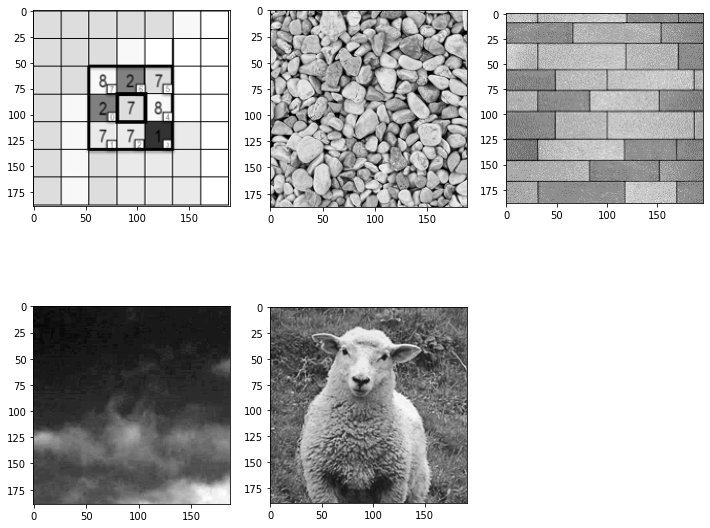

In [2]:
# Path de las imagenes
images_path = ['./images/Imagen1.png', './images/Imagen2.png', './images/Imagen3.png', './images/Imagen4.png', './images/Imagen5.png']

images = []  # Array donde van a quedar cargadas las imagenes en escala de grises

fig = plt.figure(figsize=(12,10))
for count, img in enumerate(images_path, 1):
    image = cv.imread(img, cv.IMREAD_GRAYSCALE)
    images.append(image)  # Guardo la imagen
    ax = fig.add_subplot(2, math.ceil(len(images_path)/2), count)
    ax.imshow(image, cmap='gray')
plt.show()

In [3]:
def get_pixel(img, center, x, y):
    """
    Funcion que devuelve 1 si el vecino de las coordenadas x,y es mayor al pixel recibido como centro
    Argumentos
    img: Imagen de entrada en escala de grises
    center: Valor del pixel del centro (el pixel al cual le estamos calculando el descriptor LBP)
    x: Coordenada en el eje x del vecino
    y: Coordenada en el eje y del vecino
    ---------------------------------------
    Retorno
    new_value: (int) 1 si el vecino es mayor, caso contrario 0
    """
    new_value = 0
    try:
        # Si el vecino es mayor al centro, devolvemos 1
        if img[x][y] >= center:
            new_value = 1
    except:
        # Caemos en la excepcion cuando estamos evaluando como centro un borden de la imagen y su vecino es null, entonces por ej. no tiene vecinos a la izquierda.
        pass

    return new_value

In [14]:
def lbp_calculated_pixel(img, x, y):
    """
    Funcion que toma una imagen en escala de grises, un pixel de la imagen y devuelve el descriptor LBP para ese pixel
    Argumentos
    img: Imagen de entrada en escala de grises
    x: Coordenada en el eje x
    y: Coordenada en el eje y
    ---------------------------------------
    Retorno
    val: (int) Descriptor LBP para ese pixel
    """
    center = img[x][y]  # Obtengo el valor del pixel al cual le quiero calcular el descriptor

    val_ar = []  #Array para ir guardando los valores binarios para despues convertir a decimal
    
    val_ar.append(get_pixel(img, center, x-1, y + 1))  # Calculo el valor arriba a la izquierda
    val_ar.append(get_pixel(img, center, x, y + 1))  # Calculo el valor de arriba
    val_ar.append(get_pixel(img, center, x + 1, y + 1))  # Calculo el valor de arriba a la derecha

    val_ar.append(get_pixel(img, center, x + 1, y))  # Calculo el valor de la derecha
    val_ar.append(get_pixel(img, center, x + 1, y-1))  # Calculo el valor de abajo a la derecha
    val_ar.append(get_pixel(img, center, x, y-1))  # Calculo el valor de abajo

    val_ar.append(get_pixel(img, center, x-1, y-1))  # Calculo el valor abajo a la izquierda
    val_ar.append(get_pixel(img, center, x-1, y))  # Calculo el valor a la izquierda
    
    power_val = [1, 2, 4, 8, 16, 32, 64, 128]  # Uso este array de 8 numeros (por los 8 vecinos) para convertir el numero binario a decimal

    val = 0  # Valor a devolver

    # Por cada vecino
    for i in range(len(val_ar)):
        # Acumulo su valor binario. Ej: 1x1 + 0x2 + 0x4 ...etc
        val += val_ar[i] * power_val[i]

    return val

In [15]:
def getLBPimage(gray_image):
    """
    Funcion que toma una imagen en escala de grises y devuelve otra imagen con los descriptores LBP
    Argumentos
    gray_image: Imagen de entrada en escala de grises
    ---------------------------------------
    Retorno
    img_lbp: (numpy.ndarray) con los descriptores
    """
    # Genero una matriz inicializada en 0s con las mismas dimensiones que la imagen de entrada
    img_lbp = np.zeros_like(gray_image, np.uint8)
    height, width = img_lbp.shape

    for i in range(0, height):  # Recorro altura
        for j in range(0, width):  # Recorro ancho
            img_lbp[i, j] = lbp_calculated_pixel(gray_image, i, j)  # Por cada pixel calculo el descriptor LBP

    return img_lbp            

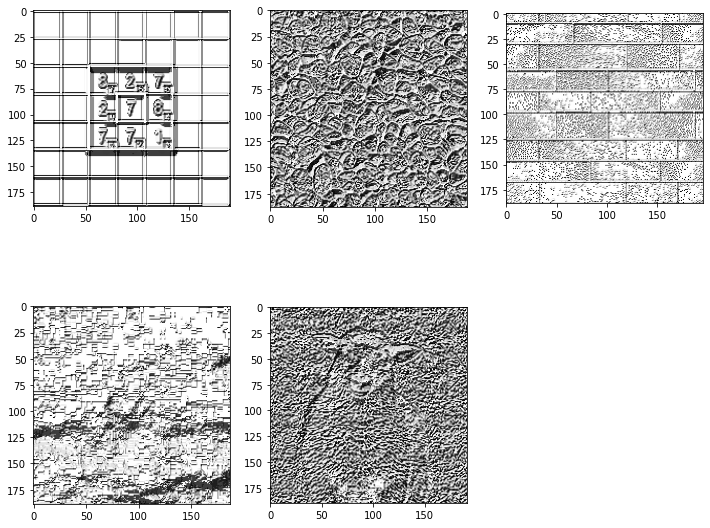

In [16]:
lbp_images = []  # Array donde van a quedar cargadas las imagenes LBP

fig = plt.figure(figsize=(12,10))
for count, img in enumerate(images, 1):
    image = getLBPimage(img)  # Calculo el LBP
    ax = fig.add_subplot(2, math.ceil(len(images)/2), count)
    ax.imshow(image, cmap='gray')
    lbp_images.append(image)
plt.show()

#### Parte 2

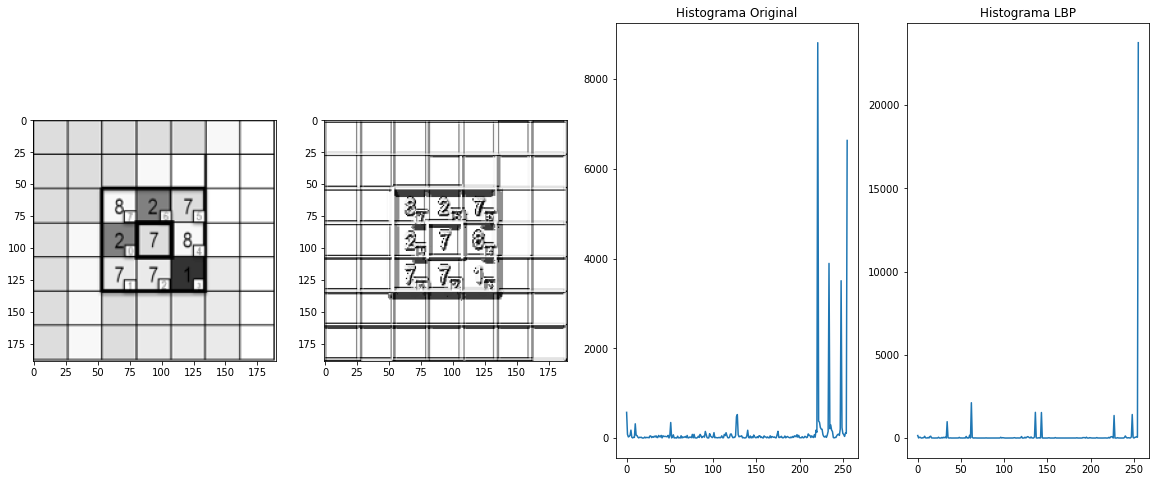

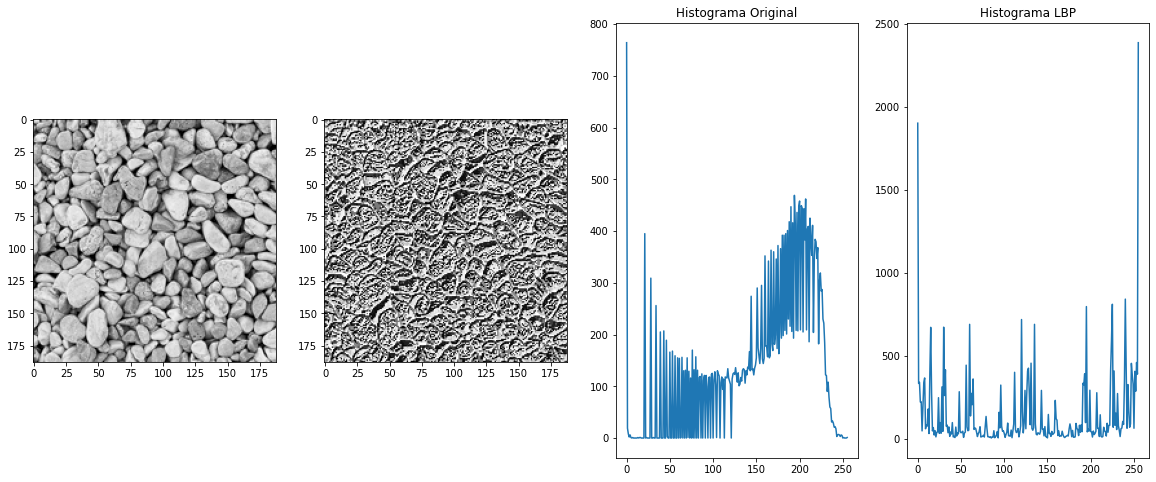

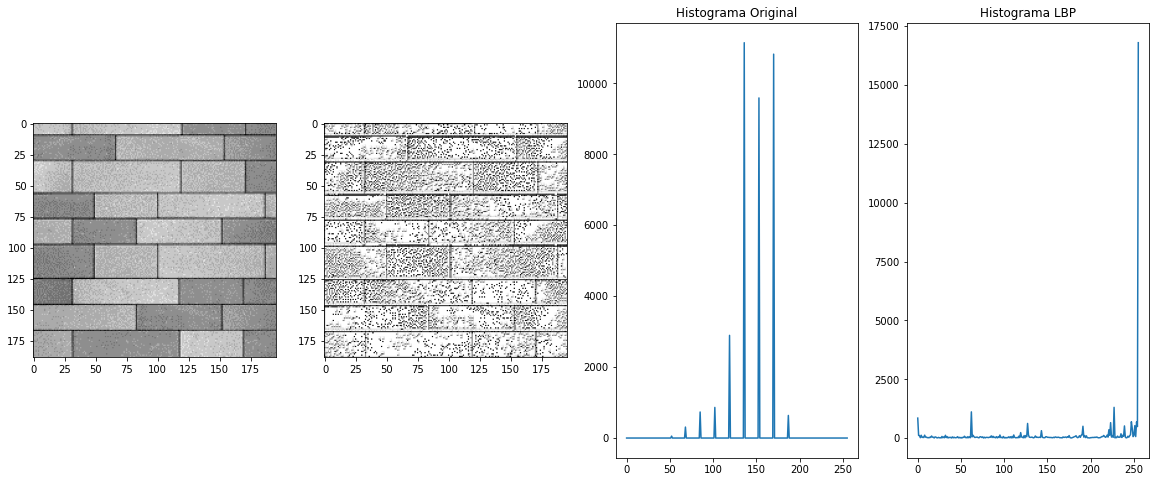

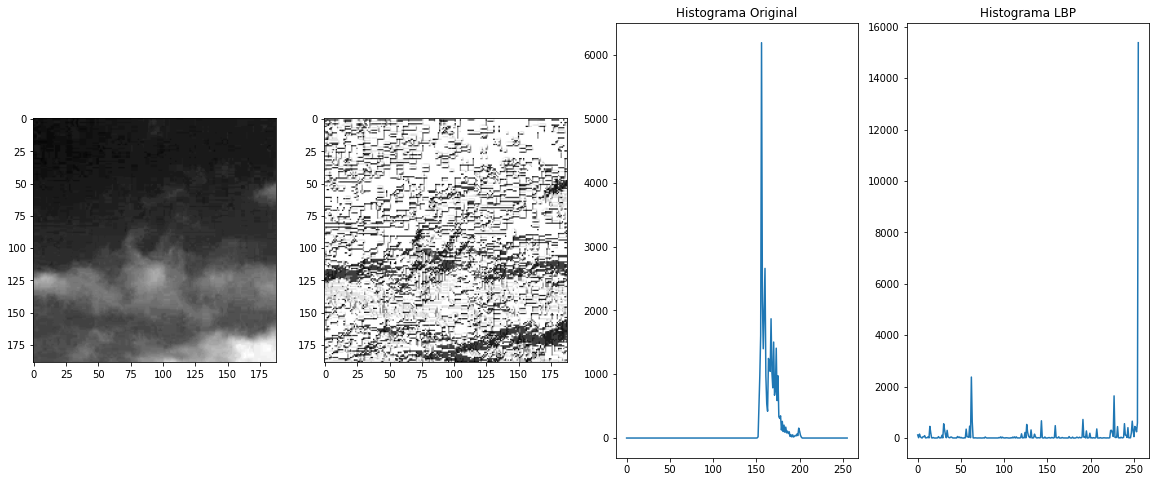

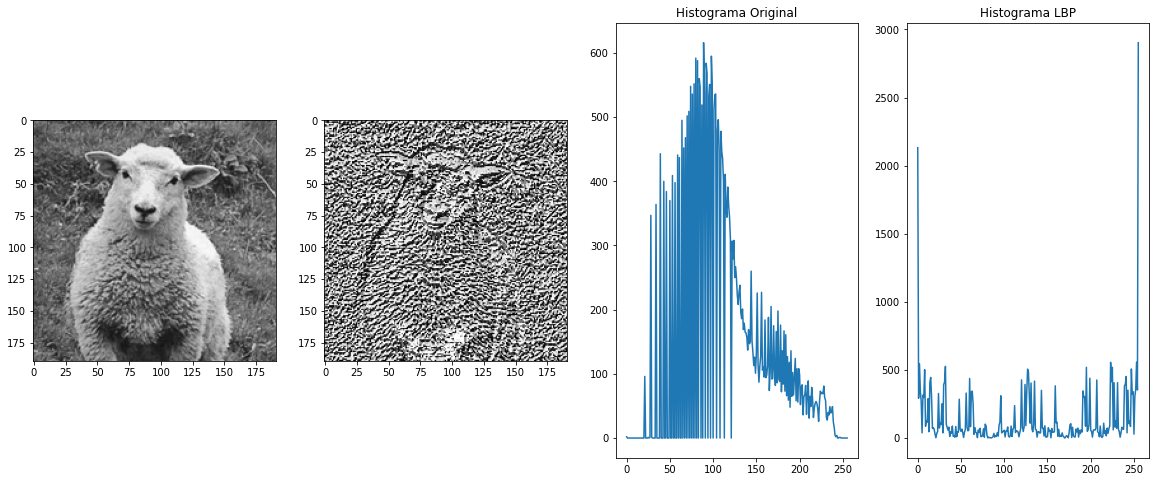

In [17]:
for i in range(0, len(lbp_images)):
    img_ravel = images[i].ravel()
    lbp_ravel = lbp_images[i].ravel()

    h1, b = np.histogram(img_ravel, 256, [0,256])
    h2,b = np.histogram(lbp_ravel, 256, [0,256])

    fig = plt.figure(figsize=(20, 8))

    iax0 = fig.add_subplot(141)
    iax0.imshow(images[i], cmap='gray')

    iax = fig.add_subplot(142)
    iax.imshow(lbp_images[i], cmap='gray')

    ax = fig.add_subplot(143)
    ax.plot(h1)
    ax.set_title('Histograma Original')
    ax2 = fig.add_subplot(144)
    ax2.plot(h2)
    ax2.set_title('Histograma LBP')

#### Conclusiones

Se implementó el metodo LBP para obtener fácilmente la información de textura de las imágenes. Este método puede capturar detalles finos en las imágenes al analizar cada pixel contra sus 8 vecinos. Sin embargo, el hecho de estar comparando cada pixel contra sus 8 vecinos es también su desventaja, porque no se puede modificar.

Al analizar los histogramas de las imágenes LBP, nos damos cuenta que las imágenes 1, 3 y 4 quedan con picos cerca del color blanco, indicandonos que la imagen es muy uniforme, a diferencia de las imagenes 2 y 5 donde el histograma está mas distribuido porque LBP pudo capturar mejor las texturas.